In [1]:
from math import pi
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile

from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_distribution

from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import SamplerV2, EstimatorV2, QiskitRuntimeService
from qiskit.visualization import plot_histogram

import numpy as np
import matplotlib.pyplot as plt

In [212]:
observables = SparsePauliOp(['XYZ'], [1])

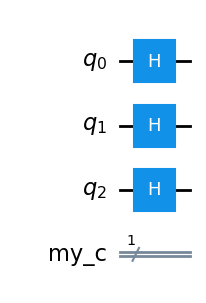

In [213]:
circuit = QuantumCircuit(3)
circuit.h([0,1,2])
cr = ClassicalRegister(1, name='my_c')
circuit.add_register(cr)
circuit.draw(reverse_bits=False)

In [16]:
N = 1000
res = []

observables = SparsePauliOp(['XYZ'], [1])

circuit = QuantumCircuit(3)
circuit.h([0,1,2])
cr = ClassicalRegister(1, name='my_c')
circuit.add_register(cr)
print(circuit)

for i in range(N):
    estimator = EstimatorV2(backend=AerSimulator())
    job = estimator.run([(circuit, observables,None)])
    exp_vals = job.result()[0].data.evs
    # print(exp_vals)
    res.append(exp_vals)


print(res)
rms = np.sqrt(np.mean(np.square(res)))
print("Root Mean Square Value:", rms)

        ┌───┐
   q_2: ┤ H ├
        ├───┤
   q_1: ┤ H ├
        ├───┤
   q_0: ┤ H ├
        └───┘
my_c: 1/═════
             
[array(0.00488281), array(0.00341797), array(0.00048828), array(-0.01708984), array(-0.01171875), array(-0.00683594), array(0.01025391), array(-0.00097656), array(-0.00488281), array(0.02783203), array(0.00878906), array(0.00390625), array(0.01123047), array(-0.02978516), array(0.02099609), array(-0.01660156), array(-0.00732422), array(-0.01220703), array(0.00195312), array(0.01855469), array(-0.02050781), array(0.00097656), array(0.00195312), array(-0.01953125), array(0.00683594), array(0.00537109), array(0.02148438), array(-0.02587891), array(-0.02246094), array(0.), array(-0.00292969), array(0.00341797), array(-0.02490234), array(-0.02880859), array(0.01464844), array(0.00341797), array(-0.01806641), array(-0.00195312), array(-0.01367188), array(-0.01757812), array(-0.00830078), array(-0.00244141), array(0.00195312), array(-0.01464844), array(-0.02050781), ar

#### YYY Observables - Estimator

        ┌───┐
   q_2: ┤ X ├
        ├───┤
   q_1: ┤ X ├
        ├───┤
   q_0: ┤ X ├
        └───┘
my_c: 1/═════
             
[array(-0.00488281), array(-0.00878906), array(0.00048828), array(-0.00976562), array(0.01220703), array(0.00976562), array(-0.00830078), array(-0.0078125), array(-0.02685547), array(0.01025391), array(0.01708984), array(-0.01953125), array(0.00537109), array(-0.00488281), array(0.03808594), array(0.00244141), array(-0.01269531), array(0.), array(-0.02294922), array(0.00195312), array(0.02148438), array(0.00585938), array(-0.00927734), array(-0.00244141), array(-0.00488281), array(-0.01757812), array(-0.02734375), array(-0.01318359), array(-0.00292969), array(-0.01318359), array(-0.0078125), array(-0.00585938), array(-0.00292969), array(0.02099609), array(0.01953125), array(-0.00048828), array(-0.00488281), array(0.00341797), array(0.00976562), array(0.01269531), array(0.00341797), array(0.00390625), array(0.00830078), array(0.015625), array(0.00195312), array(0

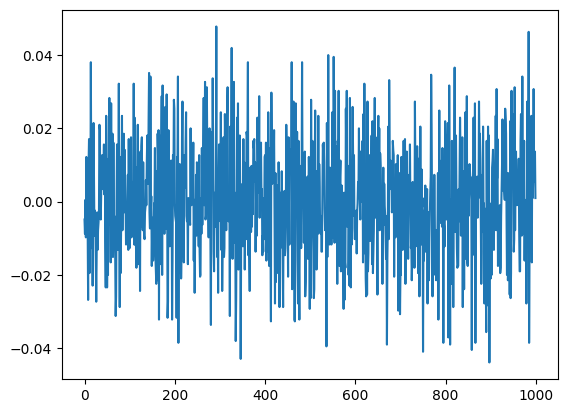

In [50]:
N = 1000
res = []

observables = SparsePauliOp(['YYY'], [1])

circuit = QuantumCircuit(3)
circuit.x([0,1])
circuit.x([2])
# circuit.h([0,1,2])
cr = ClassicalRegister(1, name='my_c')
circuit.add_register(cr)
print(circuit)

for i in range(N):
    estimator = EstimatorV2(backend=AerSimulator())
    job = estimator.run([(circuit, observables,None)])
    exp_vals = job.result()[0].data.evs
    # print(exp_vals)
    res.append(exp_vals)


print(res)
rms = np.sqrt(np.mean(np.square(res)))
print("Root Mean Square Value:", rms)
plt.plot(res)

### XYZ Observables - Estimator

        ┌───┐
   q_2: ┤ X ├
        ├───┤
   q_1: ┤ X ├
        ├───┤
   q_0: ┤ X ├
        └───┘
my_c: 1/═════
             
[array(0.02490234), array(-0.01660156), array(-0.00488281), array(0.00439453), array(-0.00097656), array(-0.01708984), array(0.00732422), array(0.01269531), array(0.00634766), array(-0.02197266), array(-0.01513672), array(0.00830078), array(0.01220703), array(0.00634766), array(-0.00146484), array(0.01025391), array(-0.00488281), array(-0.00341797), array(-0.01367188), array(0.02783203), array(-0.00439453), array(0.00683594), array(-0.00927734), array(-0.00537109), array(0.01806641), array(0.00195312), array(-0.02099609), array(0.00390625), array(0.01074219), array(0.00146484), array(-0.00292969), array(0.00585938), array(0.01904297), array(0.0078125), array(-0.03515625), array(-0.00097656), array(-0.00048828), array(-0.00195312), array(-0.00488281), array(0.00390625), array(0.00195312), array(-0.02880859), array(-0.04150391), array(-0.015625), array(-0.03320312

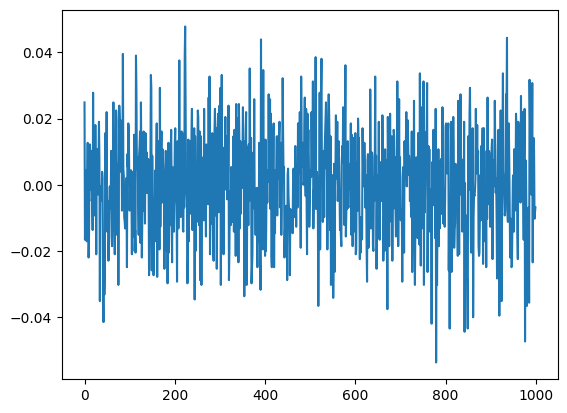

In [53]:
N = 1000
res = []

observables = SparsePauliOp(['XYZ'], [1])

circuit = QuantumCircuit(3)
circuit.x([0,1])
circuit.x([2])
# circuit.h([0,1,2])
cr = ClassicalRegister(1, name='my_c')
circuit.add_register(cr)
print(circuit)

for i in range(N):
    estimator = EstimatorV2(backend=AerSimulator())
    job = estimator.run([(circuit, observables,None)])
    exp_vals = job.result()[0].data.evs
    # print(exp_vals)
    res.append(exp_vals)


print(res)
rms = np.sqrt(np.mean(np.square(res)))
print("Root Mean Square Value:", rms)
plt.plot(res)

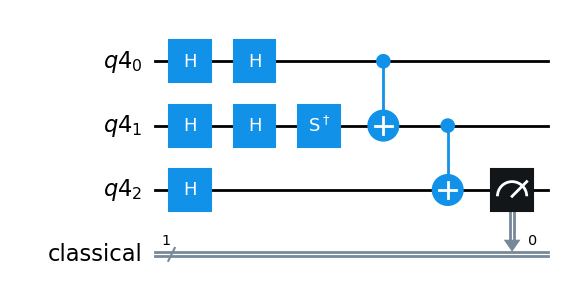

In [121]:
qr = QuantumRegister(3)
cr = ClassicalRegister(1, name='classical')
circuit = QuantumCircuit(qr, cr)

circuit.h([0,1,2])
circuit.sdg(1)
circuit.h([0,1])
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure(2, cbit=cr)
circuit.draw(reverse_bits=False)

### XYZ Observables - Sampler

In [2]:
N = 1000
res = []

qr = QuantumRegister(3)
cr = ClassicalRegister(1, name='classical')
circuit = QuantumCircuit(qr, cr)

circuit.h([0,1,2])

circuit.sdg(1)
circuit.h([0,1])
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure(2, cbit=cr)
print(circuit)

for i in range(N):
    sampler = SamplerV2(backend=AerSimulator())
    job = sampler.run([(circuit, None, 5000)])
    counts = job.result()[0].data.classical.get_counts()
    # print("Result Counts:", counts)

    total = sum(counts.values())
    # print("Total Counts:", total)

    probabilities = { state: count/total for state, count in counts.items() }
    # print("Probabilities:", probabilities)

    exp_vals = probabilities['0'] - probabilities['1']
    # print("Expectation Value:", exp_vals)

    res.append(exp_vals)

print(res)
rms = np.sqrt(np.mean(np.square(res)))
print("Root Mean Square Value:", rms)

             ┌───┐                 ┌───┐┌─┐
       q1_2: ┤ H ├─────────────────┤ X ├┤M├
             ├───┤┌─────┐┌───┐┌───┐└─┬─┘└╥┘
       q1_1: ┤ H ├┤ Sdg ├┤ H ├┤ X ├──■───╫─
             ├───┤└┬───┬┘└───┘└─┬─┘      ║ 
       q1_0: ┤ H ├─┤ H ├────────■────────╫─
             └───┘ └───┘                 ║ 
classical: 1/════════════════════════════╩═
                                         0 
[0.012399999999999967, 0.017600000000000005, 0.005200000000000038, -0.030399999999999983, 0.00039999999999995595, -0.0036000000000000476, -0.014000000000000012, -0.007600000000000051, -0.022799999999999987, -0.0016000000000000458, 0.020399999999999974, -0.013200000000000045, 0.013200000000000045, 0.02200000000000002, -0.011200000000000043, 0.00039999999999995595, 0.013600000000000001, -0.0016000000000000458, -0.01479999999999998, -0.020399999999999974, 0.008799999999999975, 0.006799999999999973, 0.028000000000000025, 0.0043999999999999595, 0.008000000000000007, 0.004799999999999971, -0.00200000000

#### YYY Observables - Sampler

             ┌───┐┌───┐┌─────┐     ┌───┐┌─┐
      q35_2: ┤ X ├┤ H ├┤ Sdg ├─────┤ X ├┤M├
             ├───┤├───┤├─────┤┌───┐└─┬─┘└╥┘
      q35_1: ┤ X ├┤ H ├┤ Sdg ├┤ X ├──■───╫─
             ├───┤├───┤├─────┤└─┬─┘      ║ 
      q35_0: ┤ X ├┤ H ├┤ Sdg ├──■────────╫─
             └───┘└───┘└─────┘           ║ 
classical: 1/════════════════════════════╩═
                                         0 
Result Counts: {'0': 2072, '1': 2024}
Result Counts: {'1': 2051, '0': 2045}
Result Counts: {'1': 2042, '0': 2054}
Result Counts: {'1': 2065, '0': 2031}
Result Counts: {'0': 2059, '1': 2037}
Result Counts: {'1': 2056, '0': 2040}
Result Counts: {'0': 2073, '1': 2023}
Result Counts: {'0': 1980, '1': 2116}
Result Counts: {'0': 2048, '1': 2048}
Result Counts: {'1': 2076, '0': 2020}
Result Counts: {'1': 2057, '0': 2039}
Result Counts: {'0': 2046, '1': 2050}
Result Counts: {'0': 2045, '1': 2051}
Result Counts: {'0': 2061, '1': 2035}
Result Counts: {'1': 2041, '0': 2055}
Result Counts: {'1': 2013, '0': 20

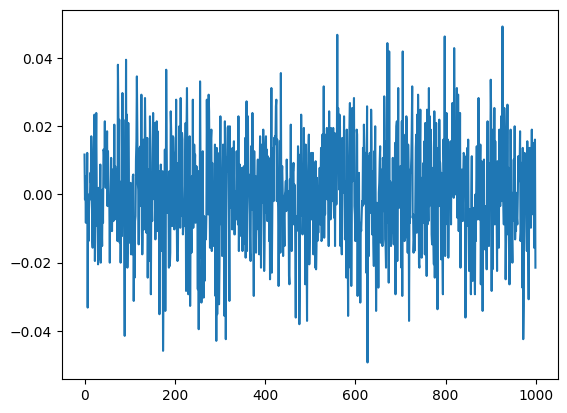

In [49]:
N = 1000
res = []

qr = QuantumRegister(3)
cr = ClassicalRegister(1, name='classical')
circuit = QuantumCircuit(qr, cr)

circuit.x([0,1])
circuit.x([2])
circuit.h([0,1,2])
circuit.sdg([0,1,2])

circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure(2, cbit=cr)
print(circuit)

for i in range(N):
    sampler = SamplerV2(backend=AerSimulator())
    job = sampler.run([(circuit, None, 4096)])
    counts = job.result()[0].data.classical.get_counts()
    print("Result Counts:", counts)

    total = sum(counts.values())
    # print("Total Counts:", total)

    probabilities = { state: count/total for state, count in counts.items() }
    probabilities['0'] = probabilities.get('0', 0.0)
    probabilities['1'] = probabilities.get('1', 0.0)

    exp_vals = (probabilities['0'])**2 - (probabilities['1'])**2
    res.append(exp_vals)

print(res)
rms = np.sqrt(np.mean(np.square(res)))
print("Root Mean Square Value:", rms)
plt.plot(res)

### XYZ Observables - Sampler

             ┌───┐                 ┌───┐┌─┐
      q36_2: ┤ X ├─────────────────┤ X ├┤M├
             ├───┤┌───┐┌─────┐┌───┐└─┬─┘└╥┘
      q36_1: ┤ X ├┤ H ├┤ Sdg ├┤ X ├──■───╫─
             ├───┤├───┤└─────┘└─┬─┘      ║ 
      q36_0: ┤ X ├┤ H ├─────────■────────╫─
             └───┘└───┘                  ║ 
classical: 1/════════════════════════════╩═
                                         0 
Result Counts: {'0': 2052, '1': 2044}
Result Counts: {'1': 2036, '0': 2060}
Result Counts: {'0': 2128, '1': 1968}
Result Counts: {'0': 2062, '1': 2034}
Result Counts: {'1': 2097, '0': 1999}
Result Counts: {'0': 2078, '1': 2018}
Result Counts: {'0': 2043, '1': 2053}
Result Counts: {'1': 2057, '0': 2039}
Result Counts: {'0': 2076, '1': 2020}
Result Counts: {'1': 2072, '0': 2024}
Result Counts: {'1': 2021, '0': 2075}
Result Counts: {'1': 2047, '0': 2049}
Result Counts: {'1': 2098, '0': 1998}
Result Counts: {'1': 2034, '0': 2062}
Result Counts: {'1': 2060, '0': 2036}
Result Counts: {'0': 2056, '1': 20

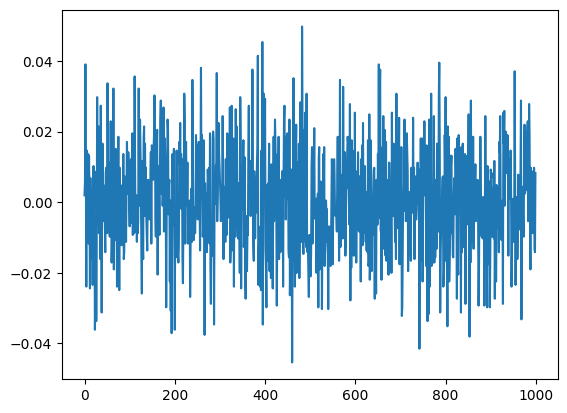

In [51]:
N = 1000
res = []

qr = QuantumRegister(3)
cr = ClassicalRegister(1, name='classical')
circuit = QuantumCircuit(qr, cr)

circuit.x([0,1,2]) # Circuit
circuit.h([0,1])
circuit.sdg([1])

circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure(2, cbit=cr)
print(circuit)

for i in range(N):
    sampler = SamplerV2(backend=AerSimulator())
    job = sampler.run([(circuit, None, 4096)])
    counts = job.result()[0].data.classical.get_counts()
    print("Result Counts:", counts)

    total = sum(counts.values())
    # print("Total Counts:", total)

    probabilities = { state: count/total for state, count in counts.items() }
    probabilities['0'] = probabilities.get('0', 0.0)
    probabilities['1'] = probabilities.get('1', 0.0)

    exp_vals = (probabilities['0'])**2 - (probabilities['1'])**2
    res.append(exp_vals)

print(res)
rms = np.sqrt(np.mean(np.square(res)))
print("Root Mean Square Value:", rms)
plt.plot(res)

             ┌───┐┌───┐┌─────┐     ┌───┐┌─┐
      q34_2: ┤ X ├┤ H ├┤ Sdg ├─────┤ X ├┤M├
             ├───┤├───┤├─────┤┌───┐└─┬─┘└╥┘
      q34_1: ┤ X ├┤ H ├┤ Sdg ├┤ X ├──■───╫─
             ├───┤├───┤├─────┤└─┬─┘      ║ 
      q34_0: ┤ X ├┤ H ├┤ Sdg ├──■────────╫─
             └───┘└───┘└─────┘           ║ 
classical: 1/════════════════════════════╩═
                                         0 
Result Counts: {'0': 2037, '1': 2059}
Total Counts: 4096
Probabilities: {'0': 0.497314453125, '1': 0.502685546875}
Expectation Value: -0.00537109375
Expectation Value: -0.00537109375
Result Counts: {'0': 2077, '1': 2019}
Total Counts: 4096
Probabilities: {'0': 0.507080078125, '1': 0.492919921875}
Expectation Value: 0.01416015625
Expectation Value: 0.01416015625
Result Counts: {'1': 2051, '0': 2045}
Total Counts: 4096
Probabilities: {'1': 0.500732421875, '0': 0.499267578125}
Expectation Value: -0.00146484375
Expectation Value: -0.00146484375
Result Counts: {'1': 2053, '0': 2043}
Total Counts: 4096


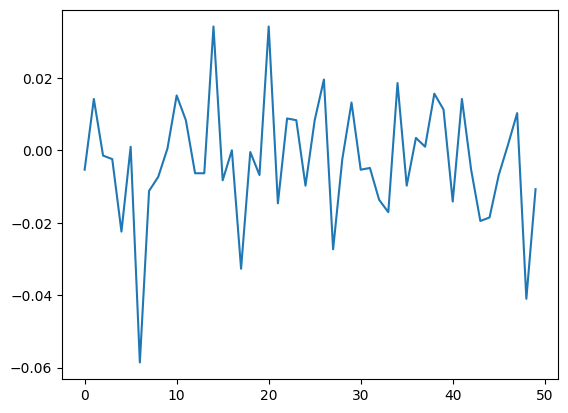

In [48]:
N = 50
res = []

qr = QuantumRegister(3)
cr = ClassicalRegister(1, name='classical')
circuit = QuantumCircuit(qr, cr)

circuit.x([0,1])
circuit.x([2])

# circuit.h([0,1,2])

circuit.h([0,1,2])
circuit.sdg([0,1,2])

circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure(2, cbit=cr)
print(circuit)

for i in range(N):
    sampler = SamplerV2(backend=AerSimulator())
    job = sampler.run([(circuit, None, 4096)])
    counts = job.result()[0].data.classical.get_counts()
    print("Result Counts:", counts)

    total = sum(counts.values())
    print("Total Counts:", total)

    probabilities = { state: count/total for state, count in counts.items() }
    print("Probabilities:", probabilities)
    # print(probabilities['0'])
    probabilities['0'] = probabilities.get('0', 0.0)
    probabilities['1'] = probabilities.get('1', 0.0)

    exp_vals_1 = (probabilities['0']) - (probabilities['1'])
    print("Expectation Value:", exp_vals_1)
    exp_vals = (probabilities['0'])**2 - (probabilities['1'])**2
    print("Expectation Value:", exp_vals)

    res.append(exp_vals)

print(res)
rms = np.sqrt(np.mean(np.square(res)))
print("Root Mean Square Value:", rms)
plt.plot(res)

In [41]:
a = 2
print(a**4)

16
